In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading Dataset
df = pd.read_csv(r"C:\Users\rajen\Desktop\ITV Project\Book recommendation system\books.csv")
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


# EDA

In [3]:
df.shape

(6810, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [5]:
# checking missing values
df.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [6]:
# removing unwanted columns
df.drop(columns=["isbn10", "subtitle", "num_pages", "num_pages"], inplace=True)

In [7]:
df

,isbn13,title,authors,categories,thumbnail,description,published_year,average_rating,ratings_count
0,9780002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,361.0
1,9780002261982,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,5164.0
2,9780006163831,The One Tree,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,172.0
3,9780006178736,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,29532.0
4,9780006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,33684.0
...,...,...,...,...,...,...,...,...,...
6805,9788185300535,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,104.0
6806,9788185944609,Secrets Of The Heart,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,324.0
6807,9788445074879,Fahrenheit 451,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,5733.0
6808,9789027712059,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,0.0


In [8]:
# checking missing values
df.isnull().sum()

isbn13              0
title               0
authors            72
categories         99
thumbnail         329
description       262
published_year      6
average_rating     43
ratings_count      43
dtype: int64

In [9]:
# removeing null values
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

isbn13            0
title             0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
ratings_count     0
dtype: int64

In [11]:
# Checking dyplicates
df.duplicated().sum()

0

In [12]:
# Converting ratings_count from float to integer
df["ratings_count"] = df["ratings_count"].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6215 entries, 0 to 6809
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6215 non-null   int64  
 1   title           6215 non-null   object 
 2   authors         6215 non-null   object 
 3   categories      6215 non-null   object 
 4   thumbnail       6215 non-null   object 
 5   description     6215 non-null   object 
 6   published_year  6215 non-null   float64
 7   average_rating  6215 non-null   float64
 8   ratings_count   6215 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 461.3+ KB


In [14]:
df.describe()

,isbn13,published_year,average_rating,ratings_count
count,6.215000e+03,6215.000000,6215.000000,6.215000e+03
mean,9.780665e+12,1999.102494,3.930674,2.075841e+04
std,5.838367e+08,9.725834,0.322190,1.261204e+05
min,9.780002e+12,1876.000000,0.000000,0.000000e+00
25%,9.780316e+12,1997.000000,3.770000,1.790000e+02
50%,9.780522e+12,2002.000000,3.950000,1.122000e+03
75%,9.780806e+12,2005.000000,4.130000,6.559000e+03
max,9.789042e+12,2019.000000,5.000000,5.629932e+06


- Average rating of books is 3.9 close to 4
- Each book as on an average recevied  15167.79 ratings

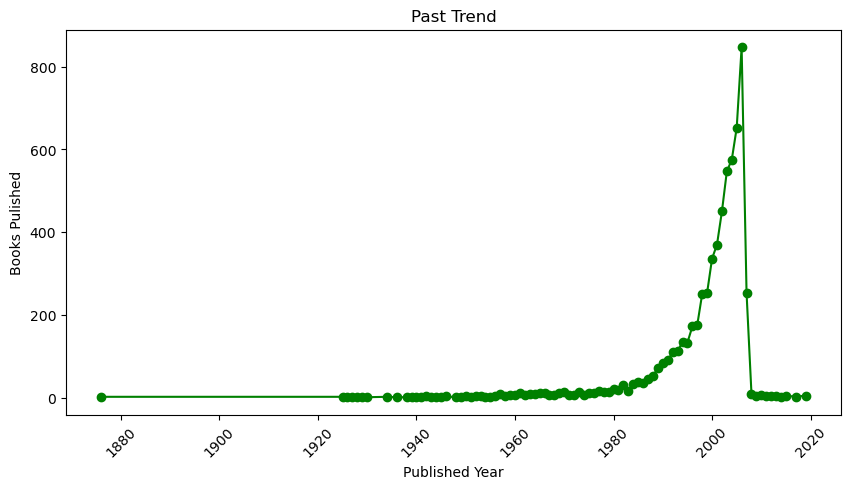

In [15]:
# Count the books of each published year
year_counts = df["published_year"].value_counts().sort_index()

# Plotting line graph
plt.figure(figsize=(10,5))
plt.plot(year_counts.index, year_counts.values, marker = "o", color="green")
plt.title('Past Trend')
plt.xlabel('Published Year')
plt.ylabel('Books Pulished')
plt.xticks(rotation=45)
plt.show()

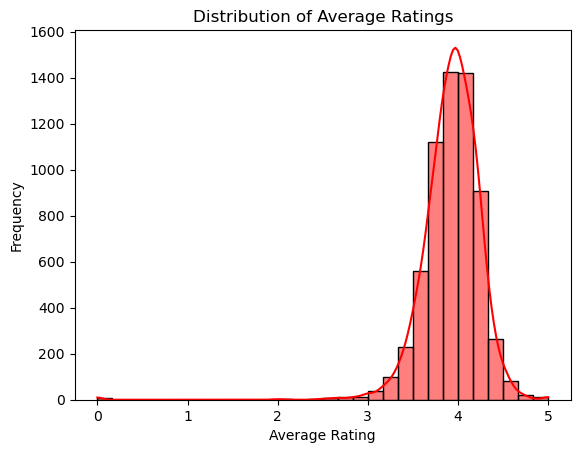

In [16]:
# Distribution of ratings
sns.histplot(df["average_rating"], bins=30, kde=True, color="red")
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

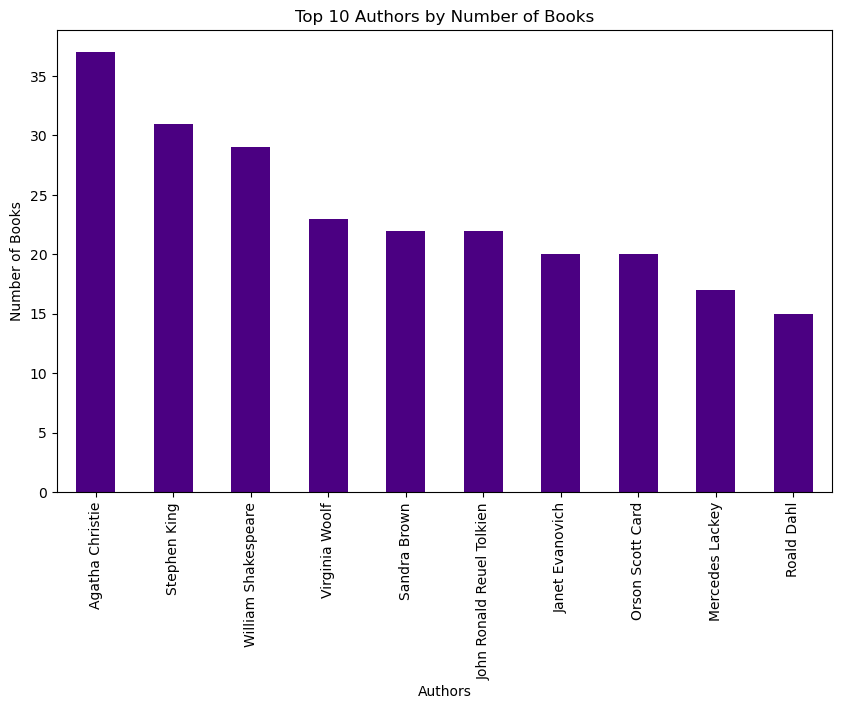

In [17]:
# top 10 authors

top_authors = df.authors.value_counts().head(10)

# plotting bar graph
plt.figure(figsize= (10,6))
top_authors.plot(kind="bar", color= "indigo")
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.show()

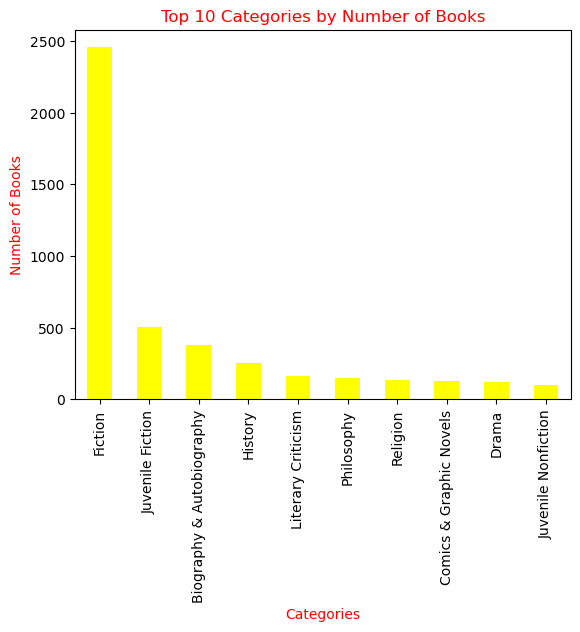

In [18]:
# Top categories analysis
top_categories = df.categories.value_counts().head(10)

# Plotting bar graph
top_categories.plot(kind='bar', color='yellow')
plt.title('Top 10 Categories by Number of Books', color="red")
plt.xlabel('Categories', color= "red")
plt.ylabel('Number of Books', color= "red")
plt.show()

C:\Users\rajen\AppData\Local\Temp\ipykernel_14916\1061208324.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


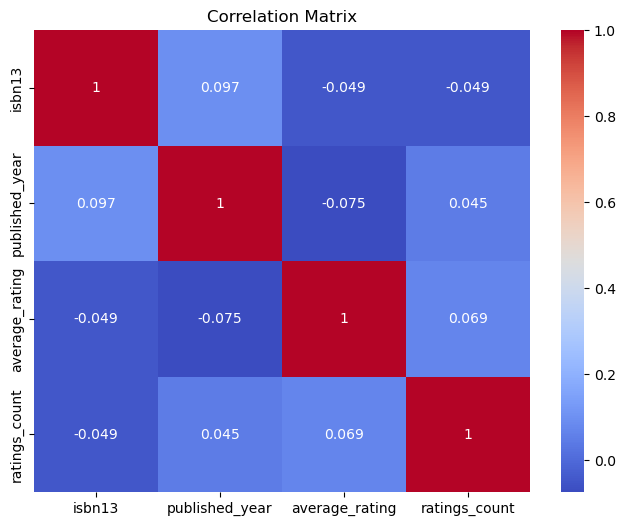

In [19]:
# Correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
popular_books_df = df[df["ratings_count"] >= 250].sort_values("average_rating" , ascending=False).head(10)
popular_books_df

,isbn13,title,authors,categories,thumbnail,description,published_year,average_rating,ratings_count
4310,9780740748479,The Complete Calvin and Hobbes,Bill Watterson,Comics & Graphic Novels,http://books.google.com/books/content?id=wmjG5...,"Brings together every ""Calvin and Hobbes"" cart...",2005.0,4.82,31249
2712,9780439682589,Harry Potter,J. K. Rowling,Juvenile Fiction,http://books.google.com/books/content?id=DAAAA...,The first five years of Harry Potter magic are...,2004.0,4.78,38872
5348,9780836221367,It's a Magical World,Bill Watterson,Humor,http://books.google.com/books/content?id=y1NVN...,The final collection of comic strips from the ...,1996.0,4.76,23336
2730,9780439827607,The Harry Potter Collection,J. K. Rowling,Juvenile Fiction,http://books.google.com/books/content?id=v0z1P...,The first six years of Harry Potter magic are ...,2005.0,4.73,27410
5345,9780836217698,Homicidal Psycho Jungle Cat,Bill Watterson,Humor,http://books.google.com/books/content?id=-aOTQ...,"Reprising the wide-open landscape format of, T...",1994.0,4.72,14952
4308,9780740721359,Calvin and Hobbes: Sunday Pages 1985-1995,Bill Watterson,Comics & Graphic Novels,http://books.google.com/books/content?id=3-7lJ...,Compiles a selection of Sunday cartoons select...,2001.0,4.71,3537
2869,9780446578271,The Everyday Life Bible,Joyce Meyer,Bibles,http://books.google.com/books/content?id=tlPAH...,Joyce Meyer's no-nonsense approach to life and...,2006.0,4.70,1715
1451,9780310929550,Zondervan NIV Study Bible,Kenneth L. Barker;Donald W. Burdick,Bibles,http://books.google.com/books/content?id=WvYLG...,#1 Best-selling study Bible in the best-sellin...,2002.0,4.70,4092
1569,9780312643065,The Price of the Ticket,James Baldwin,Literary Criticism,http://books.google.com/books/content?id=VbkZx...,The works of James Baldwin constitute one of t...,1985.0,4.70,396
5344,9780836217353,The Days Are Just Packed,Bill Watterson,Humor,http://books.google.com/books/content?id=_7jI4...,"The irrepressible Calvin, aided by his mischie...",1993.0,4.69,20021


In [21]:
popular_books_df.drop(columns=["isbn13", "published_year"], inplace=True)

In [22]:
popular_books_df = popular_books_df.reset_index(drop=True)
popular_books_df

,title,authors,categories,thumbnail,description,average_rating,ratings_count
0,The Complete Calvin and Hobbes,Bill Watterson,Comics & Graphic Novels,http://books.google.com/books/content?id=wmjG5...,"Brings together every ""Calvin and Hobbes"" cart...",4.82,31249
1,Harry Potter,J. K. Rowling,Juvenile Fiction,http://books.google.com/books/content?id=DAAAA...,The first five years of Harry Potter magic are...,4.78,38872
2,It's a Magical World,Bill Watterson,Humor,http://books.google.com/books/content?id=y1NVN...,The final collection of comic strips from the ...,4.76,23336
3,The Harry Potter Collection,J. K. Rowling,Juvenile Fiction,http://books.google.com/books/content?id=v0z1P...,The first six years of Harry Potter magic are ...,4.73,27410
4,Homicidal Psycho Jungle Cat,Bill Watterson,Humor,http://books.google.com/books/content?id=-aOTQ...,"Reprising the wide-open landscape format of, T...",4.72,14952
5,Calvin and Hobbes: Sunday Pages 1985-1995,Bill Watterson,Comics & Graphic Novels,http://books.google.com/books/content?id=3-7lJ...,Compiles a selection of Sunday cartoons select...,4.71,3537
6,The Everyday Life Bible,Joyce Meyer,Bibles,http://books.google.com/books/content?id=tlPAH...,Joyce Meyer's no-nonsense approach to life and...,4.70,1715
7,Zondervan NIV Study Bible,Kenneth L. Barker;Donald W. Burdick,Bibles,http://books.google.com/books/content?id=WvYLG...,#1 Best-selling study Bible in the best-sellin...,4.70,4092
8,The Price of the Ticket,James Baldwin,Literary Criticism,http://books.google.com/books/content?id=VbkZx...,The works of James Baldwin constitute one of t...,4.70,396
9,The Days Are Just Packed,Bill Watterson,Humor,http://books.google.com/books/content?id=_7jI4...,"The irrepressible Calvin, aided by his mischie...",4.69,20021


In [23]:
#popular_books_df.to_csv("Top_50_books.csv")

In [24]:
df = df.reset_index(drop=True)
df

,isbn13,title,authors,categories,thumbnail,description,published_year,average_rating,ratings_count
0,9780002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,361
1,9780002261982,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,5164
2,9780006163831,The One Tree,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,172
3,9780006178736,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,29532
4,9780006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,33684
...,...,...,...,...,...,...,...,...,...
6210,9788173031014,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,24
6211,9788179921623,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,1568
6212,9788185300535,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,104
6213,9789027712059,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,0


In [25]:
# name of books 

for name in df["title"]:
    print(name)

Gilead
Spider's Web
The One Tree
Rage of angels
The Four Loves
The Problem of Pain
An Autobiography
Empires of the Monsoon
The Gap Into Madness
Master of the Game
If Tomorrow Comes
Assassin's Apprentice
Warhost of Vastmark
The Once and Future King
Murder in LaMut
Jimmy the Hand
Witness for the Prosecution & Selected Plays
The Little House
Mystical Paths
Glittering Images
Glamorous Powers
The Mad Ship
Post Captain
The Reverse of the Medal
Miss Marple
The Years of Rice and Salt
Spares
Gravity
The Wise Woman
Girls' Night in
The White Album
The Bonesetter's Daughter
The Lexus and the Olive Tree
'Tis
Ocean Star Express
A Small Pinch of Weather
Koko
Tree and Leaf
Partners in Crime
Murder in Mesopotamia
The Lord of the Rings, the Return of the King
All Families are Psychotic
Death in the Clouds
Appointment with Death
Hallowe'en Party
Hercule Poirot's Christmas
The Big Four
The Thirteen Problems
They Do it with Mirrors
A Murder is Announced
The Mirror Crack'd from Side to Side
Mrs McGinty's De

In [26]:
# removing " , " from title to increase accuracy of recommendation
title_list = list()

for i in df["title"]:
    name = i.split(",")
    title_list.append("".join(name))

In [27]:
for i in title_list:
    print(i)

Gilead
Spider's Web
The One Tree
Rage of angels
The Four Loves
The Problem of Pain
An Autobiography
Empires of the Monsoon
The Gap Into Madness
Master of the Game
If Tomorrow Comes
Assassin's Apprentice
Warhost of Vastmark
The Once and Future King
Murder in LaMut
Jimmy the Hand
Witness for the Prosecution & Selected Plays
The Little House
Mystical Paths
Glittering Images
Glamorous Powers
The Mad Ship
Post Captain
The Reverse of the Medal
Miss Marple
The Years of Rice and Salt
Spares
Gravity
The Wise Woman
Girls' Night in
The White Album
The Bonesetter's Daughter
The Lexus and the Olive Tree
'Tis
Ocean Star Express
A Small Pinch of Weather
Koko
Tree and Leaf
Partners in Crime
Murder in Mesopotamia
The Lord of the Rings the Return of the King
All Families are Psychotic
Death in the Clouds
Appointment with Death
Hallowe'en Party
Hercule Poirot's Christmas
The Big Four
The Thirteen Problems
They Do it with Mirrors
A Murder is Announced
The Mirror Crack'd from Side to Side
Mrs McGinty's Dea

In [28]:
df["title"] = title_list

In [29]:
# making tags to find similarity
df["tags"] =df["title"] + df["authors"] + df["categories"] + df["description"]
df["tags"]

0       GileadMarilynne RobinsonFictionA NOVEL THAT RE...
1       Spider's WebCharles Osborne;Agatha ChristieDet...
2       The One TreeStephen R. DonaldsonAmerican ficti...
3       Rage of angelsSidney SheldonFictionA memorable...
4       The Four LovesClive Staples LewisChristian lif...
                              ...                        
6210    Journey to the EastHermann HesseAdventure stor...
6211    The Monk Who Sold His Ferrari: A Fable About F...
6212    I Am thatSri Nisargadatta Maharaj;Sudhakar S. ...
6213    The Berlin PhenomenologyGeorg Wilhelm Friedric...
6214    'I'm Telling You Stories'Helena Grice;Tim Wood...
Name: tags, Length: 6215, dtype: object

In [30]:
df.head()

,isbn13,title,authors,categories,thumbnail,description,published_year,average_rating,ratings_count,tags
0,9780002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,361,GileadMarilynne RobinsonFictionA NOVEL THAT RE...
1,9780002261982,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,5164,Spider's WebCharles Osborne;Agatha ChristieDet...
2,9780006163831,The One Tree,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,172,The One TreeStephen R. DonaldsonAmerican ficti...
3,9780006178736,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,29532,Rage of angelsSidney SheldonFictionA memorable...
4,9780006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,33684,The Four LovesClive Staples LewisChristian lif...


In [31]:
# creating new dataframe for model building
new_df = df[["isbn13","title", "tags", "thumbnail"]]
new_df

,isbn13,title,tags,thumbnail
0,9780002005883,Gilead,GileadMarilynne RobinsonFictionA NOVEL THAT RE...,http://books.google.com/books/content?id=KQZCP...
1,9780002261982,Spider's Web,Spider's WebCharles Osborne;Agatha ChristieDet...,http://books.google.com/books/content?id=gA5GP...
2,9780006163831,The One Tree,The One TreeStephen R. DonaldsonAmerican ficti...,http://books.google.com/books/content?id=OmQaw...
3,9780006178736,Rage of angels,Rage of angelsSidney SheldonFictionA memorable...,http://books.google.com/books/content?id=FKo2T...
4,9780006280897,The Four Loves,The Four LovesClive Staples LewisChristian lif...,http://books.google.com/books/content?id=XhQ5X...
...,...,...,...,...
6210,9788173031014,Journey to the East,Journey to the EastHermann HesseAdventure stor...,http://books.google.com/books/content?id=rq6JP...
6211,9788179921623,The Monk Who Sold His Ferrari: A Fable About F...,The Monk Who Sold His Ferrari: A Fable About F...,http://books.google.com/books/content?id=c_7mf...
6212,9788185300535,I Am that,I Am thatSri Nisargadatta Maharaj;Sudhakar S. ...,http://books.google.com/books/content?id=Fv_JP...
6213,9789027712059,The Berlin Phenomenology,The Berlin PhenomenologyGeorg Wilhelm Friedric...,http://books.google.com/books/content?id=Vy7Sk...


In [32]:
new_df["tags"][0]

'GileadMarilynne RobinsonFictionA NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the 

In [33]:
# importing nltk to apply steming
import nltk
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [34]:
# making function to apply steaming
def steming(text):
    '''
    Stem each word in the input text using Porter Stemmer.
    
    Parameters:
        text (str): The input text to be stemmed.
        
    Returns:
        str: The stemmed text where each word has been processed using Porter Stemmer.
    '''

    y = list()
    
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [35]:
steming('Marilynne RobinsonFictionA NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world has to offer. At its heart is a tale of the sacred bonds between fathers and sons, pitch-perfect in style and story, set to dazzle critics and readers alike.')

'marilynn robinsonfictiona novel that reader and critic have been eagerli anticip for over a decade, gilead is an astonishingli imagin stori of remark lives. john ame is a preacher, the son of a preacher and the grandson (both matern and paternal) of preachers. it’ 1956 in gilead, iowa, toward the end of the reverend ames’ life, and he is absorb in record hi family’ story, a legaci for the young son he will never see grow up. haunt by hi grandfather’ presence, john tell of the rift between hi grandfath and hi father: the elder, an angri visionari who fought for the abolitionist cause, and hi son, an ardent pacifist. he is troubled, too, by hi prodig namesake, jack (john ames) boughton, hi best friend’ lost son who return to gilead search for forgiv and redemption. told in john ames’ joyous, rambl voic that find beauty, humour and truth in the smallest of life’ details, gilead is a song of celebr and accept of the best and the worst the world ha to offer. at it heart is a tale of the sa

In [36]:
new_df["tags"]=new_df["tags"].apply(steming)

C:\Users\rajen\AppData\Local\Temp\ipykernel_14916\664962030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["tags"]=new_df["tags"].apply(steming)


In [37]:
#importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words="english")

In [38]:
# converting tags (text) into vectors
vectors = cv.fit_transform(new_df["tags"]).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
# importing cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
# finding similarity for each vector
similarity = cosine_similarity(vectors)
similarity

array([[1.        , 0.02589119, 0.        , ..., 0.27090303, 0.07845942,
        0.02139802],
       [0.02589119, 1.        , 0.0285831 , ..., 0.07815601, 0.07202264,
        0.02160679],
       [0.        , 0.0285831 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27090303, 0.07815601, 0.        , ..., 1.        , 0.11196085,
        0.02583712],
       [0.07845942, 0.07202264, 0.        , ..., 0.11196085, 1.        ,
        0.        ],
       [0.02139802, 0.02160679, 0.        , ..., 0.02583712, 0.        ,
        1.        ]])

In [41]:
similarity.shape

(6215, 6215)

In [42]:
# fetching top 5 similar vectors ignoring first one
sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x:x[1])[1:6]

[(3980, 0.529574091085202),
 (1961, 0.5126602313623643),
 (4399, 0.5109523080212682),
 (5543, 0.5065362251294778),
 (5635, 0.4935481167928245)]

In [43]:
# making recommender function
def recommender(book):
    '''
    Recommend similar books based on the input book title.

    Parameters:
        book (str): The title of the book for which recommendations are sought.

    Returns:
        None. Prints the titles of the top 5 recommended books similar to the input book.
    '''
    book_index = new_df[new_df["title"] == book].index[0]
    distance = similarity[book_index]
    book_list = sorted(list(enumerate(distance)), reverse=True, key=lambda x:x[1])[1:6]
    
    for i in book_list:
        print(new_df.iloc[i[0]].title)
        

In [44]:
recommender("Baby Einstein: Neighborhood Animals")  

That was Then this is Now
This Side of Brightness
This Craft of Verse
The Fourth of July Story
Everest


In [45]:
new_df.to_dict()

{'isbn13': {0: 9780002005883,
  1: 9780002261982,
  2: 9780006163831,
  3: 9780006178736,
  4: 9780006280897,
  5: 9780006280934,
  6: 9780006353287,
  7: 9780006380832,
  8: 9780006470229,
  9: 9780006472612,
  10: 9780006479673,
  11: 9780006480099,
  12: 9780006482079,
  13: 9780006483014,
  14: 9780006483892,
  15: 9780006483908,
  16: 9780006490456,
  17: 9780006496434,
  18: 9780006496878,
  19: 9780006496892,
  20: 9780006496922,
  21: 9780006498865,
  22: 9780006499169,
  23: 9780006499268,
  24: 9780006499626,
  25: 9780006511489,
  26: 9780006512677,
  27: 9780006513087,
  28: 9780006514640,
  29: 9780006514855,
  30: 9780006545866,
  31: 9780006550433,
  32: 9780006551393,
  33: 9780006551812,
  34: 9780006646006,
  35: 9780006754893,
  36: 9780007103676,
  37: 9780007105045,
  38: 9780007111503,
  39: 9780007113804,
  40: 9780007116263,
  41: 9780007117536,
  42: 9780007119332,
  43: 9780007119356,
  44: 9780007120680,
  45: 9780007120697,
  46: 9780007120819,
  47: 9780007

In [46]:
import pickle
pickle.dump(new_df.to_dict(),open("Book_dict.pkl","wb"))

In [47]:
pickle.dump(similarity, open("similarity.pkl","wb"))

In [48]:
pickle.dump(popular_books_df.to_dict(), open('popular_books', "wb"))